In [1]:
import rootpath
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
os.chdir(rootpath.append()[1])

Populating the interactive namespace from numpy and matplotlib


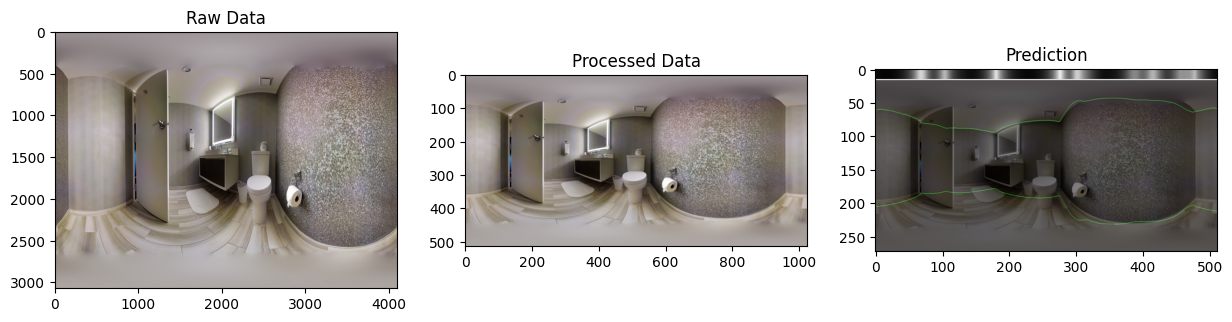

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,3,figsize=(15,30))
img_0 = mpimg.imread('assets/rooms_processed/pano_room2.png')
ax[0].imshow(img_0)
ax[0].set_title('Raw Data')

img_1 = mpimg.imread('assets/preprocessed/pano_room2_aligned_rgb.png')
ax[1].imshow(img_1)
ax[1].set_title('Processed Data')

img_2 = mpimg.imread('assets/inferenced/pano_room2_aligned_rgb.raw.png')
ax[2].imshow(img_2)
ax[2].set_title('Prediction')

plt.show()

In [3]:
from viewers.jupyter_pcd_plot import draw_geometries

In [21]:
import plotly.graph_objects as go
import numpy as np
#function from https://colab.research.google.com/drive/1CR_HDvJ2AnjJV3Bf5vwP70K0hx3RcdMb?usp=sharing#scrollTo=6LPKVOCjEtjv

def draw_geometries(pcd,height_threshold=None):
    graph_objects = []

    array_points=np.asarray(pcd.points)
    colors_array=np.asarray(pcd.colors)

    if height_threshold:
        array_points_shorter=array_points[array_points[:,2]<height_threshold]
        colors_array_shorter=colors_array[array_points[:,2]<height_threshold]
    else:
        array_points_shorter=array_points
        colors_array_shorter=colors_array

    graph_objects=[]
    points=array_points_shorter
    colors=colors_array_shorter

    scatter_3d = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=1, color=colors))
    graph_objects.append(scatter_3d)
        
        
    fig = go.Figure(
        data=graph_objects,
        layout=dict(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False)
            )
        )
    )
    return fig

    
    

In [4]:
import open3d as o3d
pcd= o3d.io.read_point_cloud("assets/3d_files/room2.ply")


o3d.visualization.draw_geometries = draw_geometries # replace function
fig=o3d.visualization.draw_geometries(pcd)

In [5]:
fig.write_html('notebooks/room2.html')

In [6]:
from IPython.display import IFrame

IFrame(src='room2.html', width=700, height=600)